In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
path = '/content/drive/MyDrive/Project Docments/Stock prediction/dataset/historical data/ES_continuous_adjusted_1hour.txt'
df = pd.read_csv(path ,sep=",", header=None, names=["DateTime", "Open", "High", "Low", "Close", "Volume"])
df['DateTime'] = pd.to_datetime(df['DateTime'])
# df = np.array(df)[:,3:4].astype(np.float)
# df['DateTime'].dt.day[2269]

Text(0, 0.5, 'Close price')

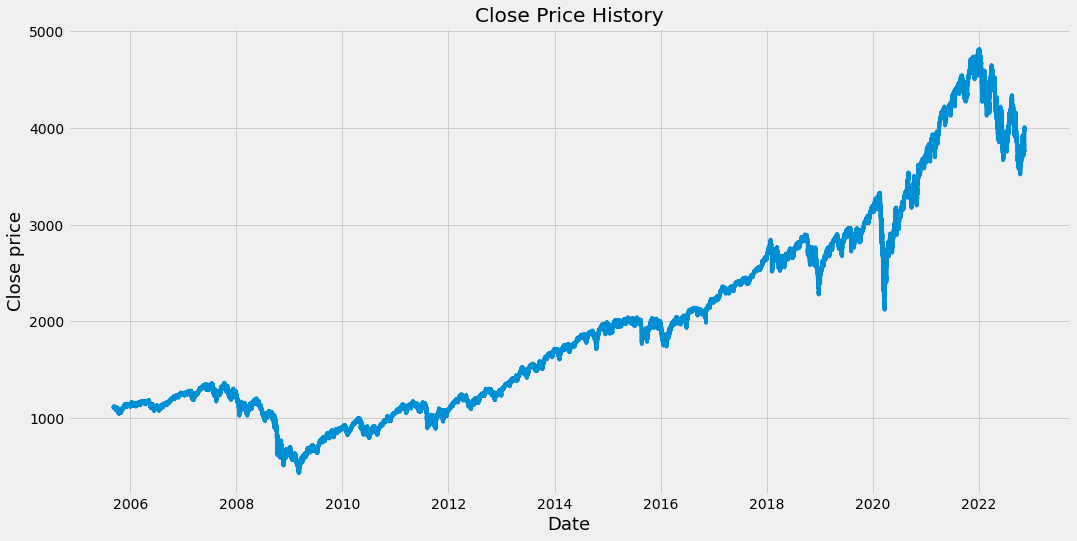

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df["DateTime"],df["Close"])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close price',fontsize = 18)

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_length = math.ceil(len(dataset)*0.8)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[:training_data_length]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)

[array([0.15546937, 0.15546937, 0.15541234, 0.15535531, 0.15535531,
       0.15535531, 0.15535531, 0.15529828, 0.15535531, 0.15535531,
       0.15535531, 0.15535531, 0.15529828, 0.15518421, 0.15512718,
       0.15535531, 0.15512718, 0.15501312, 0.15552641, 0.15529828,
       0.15558344, 0.1556975 , 0.1556975 , 0.15603969, 0.15564047,
       0.15564047, 0.15392951, 0.15387248, 0.15381544, 0.15381544,
       0.15370138, 0.15370138, 0.15375841, 0.15358732, 0.15381544,
       0.15358732, 0.15364435, 0.15364435, 0.15364435, 0.15341622,
       0.15484202, 0.15495609, 0.15512718, 0.15541234, 0.15529828,
       0.15512718, 0.15472796, 0.15495609, 0.15472796, 0.15467093,
       0.15484202, 0.15478499, 0.15489905, 0.15495609, 0.15484202,
       0.15484202, 0.15495609, 0.15489905, 0.15518421, 0.15558344])]
[0.15558343789209536]


In [ ]:
x_train , y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1) )
print(x_train.shape)
print(y_train.shape)

(82706, 60, 1)
(82706,)


In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
82706/82706 [==============================] - 566s 7ms/step - loss: 3.0634e-05
Epoch 2/100
82706/82706 [==============================] - 557s 7ms/step - loss: 8.7804e-06
Epoch 3/100
46010/82706 [===============>..............] - ETA: 4:21 - loss: 6.9346e-06

KeyboardInterrupt: ignored

In [ ]:
test_data = scaled_data[training_data_length - 60:,:]
x_test = []
y_test = dataset[training_data_length:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


647/647 [==============================] - 3s 4ms/step


In [ ]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


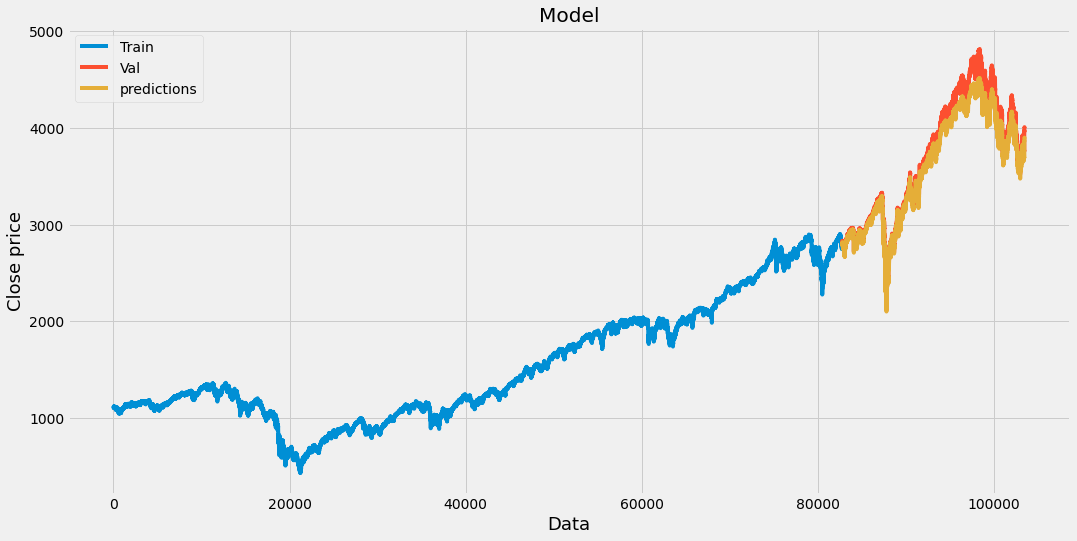

In [ ]:
train = data[:training_data_length]
valid = data[training_data_length:]
valid['predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize = 18)
plt.ylabel('Close price',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc = 'lower_right')
plt.show()

In [ ]:
valid

,Close,predictions
82766,2809.50,2787.855957
82767,2809.00,2795.222656
82768,2807.50,2794.502930
82769,2822.50,2793.544922
82770,2831.75,2808.987061
...,...,...
103452,3977.25,3871.387207
103453,3997.50,3879.893555
103454,4008.25,3893.658936
103455,4000.75,3899.614258
